**Revist the Breast Cancer Wisconsin data from sklearn. I use this dataset in the Perceptron notebook. However, the accuracy rate is only 88%. I want to see whether logistic regression improves the classification results**

Load necessary packages

In [15]:
# Load Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Load the data

In [16]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/usr/local/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(v

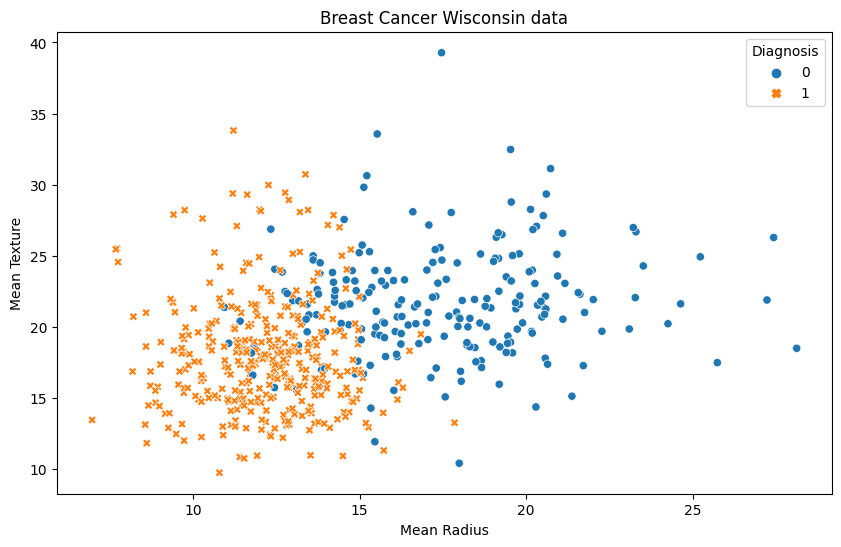

In [17]:
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(x = "mean radius", y = "mean texture",
                hue = 'target', data = df, style = 'target')

plt.title('Breast Cancer Wisconsin data')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')

plt.legend(title='Diagnosis')
plt.show()

<span style="color: blue;">We can see from the plot that being benign (1) and being malignant (0) are non-linearly seperable. Therefore, the logistic regression may help. Notice that the probability of being malignant is higher than the probability of being benign whenever mean radius is more than 15. Conversely, the probability of being benign is higher than the probability of being malignant when mean radius is less than 15. Observing this, only using the mean radius as our feature measurment observe the figure as follows.</span>

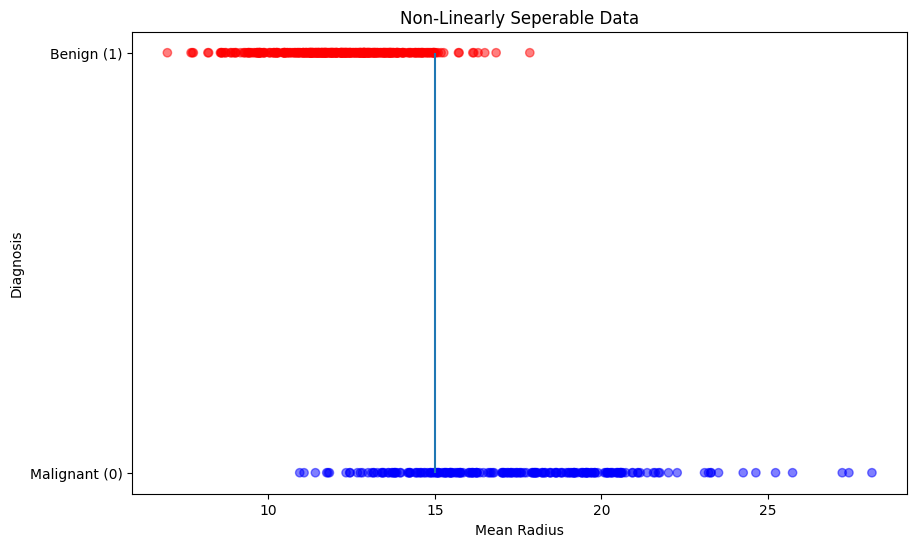

In [18]:
plt.figure(figsize=(10, 6))

colors = ['red' if x == 1 else 'blue' for x in df['target']]
plt.scatter(df['mean radius'], df['target'], c=colors, alpha=0.5)

plt.vlines(15,0,1)
plt.title('Non-Linearly Seperable Data')
plt.xlabel('Mean Radius')
plt.ylabel('Diagnosis')
plt.yticks([0, 1], ['Malignant (0)','Benign (1)'])

plt.show()

<span style="color: blue;">It seems that logistic regression can work. **We are going to build the logistic single neuron**.</span>

Define the sigmoid activation function and the cross entropy loss function

In [19]:
def sigmoid(z):
    return 1.0/(1.0 + np.exp(-z))

def cross_entropy_loss(y_hat, y):
    return - y*np.log(y_hat) - (1-y)*np.log(1-y_hat)

I will further build the SingleNeuron class in the Linear Regression notebook.

In [20]:
class SingleNeuron(object):
    
    def __init__(self, activation_function, cost_function):
        self.activation_function = activation_function
        self.cost_function = cost_function

    def train(self, X, y, alpha = 0.005, epochs = 50):
        
        self.w_ = np.random.rand(1 + X.shape[1])
        self.errors_ = []
        N = X.shape[0]

        for _ in range(epochs):
            errors = 0
            for xi, target in zip(X,y):
                error = (self.predict(xi) - target)
                self.w_[:-1] -= alpha*error*xi
                self.w_[-1] -= alpha*error
                errors += self.cost_function(self.predict(xi), target)
            self.errors_.append(errors/N)
        return self
    
    def predict(self, X):
        preactivation = np.dot(X, self.w_[:-1]) + self.w_[-1]
        return self.activation_function(preactivation)
    
    def plot_cost_function(self):
        fig, axs = plt.subplots(figsize = (10,8))
        axs.plot(range(1, len(self.errors_) + 1),
                 self.errors_,
                 label = "Cost function")
        axs.set_xlabel("epochs", fontsize = 15)
        axs.set_ylabel("Cost", fontsize = 15)
        axs.legend(fontsize = 15)
        axs.set_title("Cost Calculated after Epoch During Training", fontsize = 18)
        plt.show()
    
    def plot_decision_boundary(self, X, y, xstring="x", ystring="y"):
        plt.figure(figsize=(10, 8))
        plot_decision_regions(X, y, clf = self)
        plt.title("Neuron Decision Boundary", fontsize = 18)
        plt.xlabel(xstring, fontsize = 15)
        plt.ylabel(ystring, fontsize = 15)
        plt.show()

Apply the single neuron to get the logistic regression model

In [21]:
# Split the data into 30% training and 70% testing
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

node = SingleNeuron(sigmoid, cross_entropy_loss)
node.train(X_train[:,[0]], y_train, alpha = 0.01, epochs = 500)

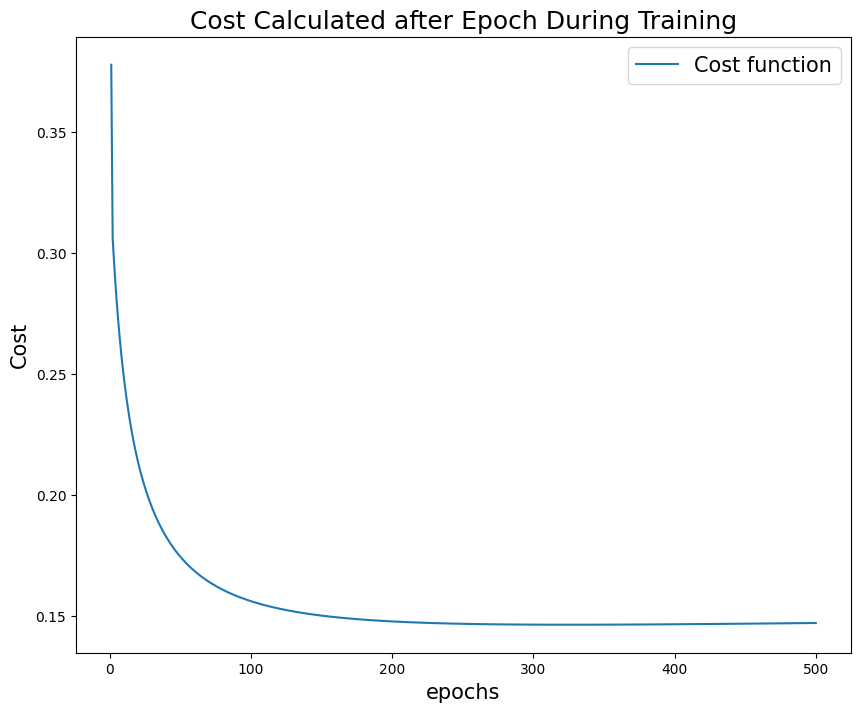

In [22]:
node.plot_cost_function()

<span style="color: blue;">The cost function over the epochs during training helps us verify that are neuron is indeed learning over time.</span>

We now visualize te learned curve into the data.

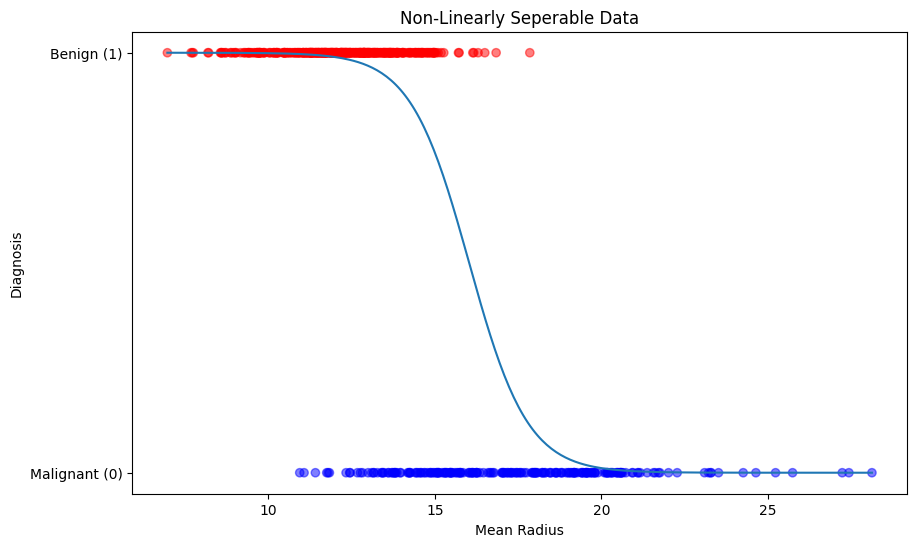

In [23]:
plt.figure(figsize=(10, 6))

colors = ['red' if x == 1 else 'blue' for x in df['target']]
plt.scatter(df['mean radius'], df['target'], c=colors, alpha=0.5)


domain = np.linspace(X_train[:,[0]].min(),X_train[:,[0]].max(),300)
plt.plot(domain, node.predict(domain.reshape(-1, 1)))
plt.title('Non-Linearly Seperable Data')
plt.xlabel('Mean Radius')
plt.ylabel('Diagnosis')
plt.yticks([0, 1], ['Malignant (0)','Benign (1)'])

plt.show()

In [24]:
classification_error = (np.rint(node.predict(X_train[:,[0]])) != y_train).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y_train)}")

Classification Error = 0.14321608040201006


In [25]:
classification_error = (np.rint(node.predict(X_test[:,[0]])) != y_test).astype(int)
print(f"Classification Error = {sum(classification_error)/ len(y_test)}")

Classification Error = 0.15789473684210525


<span style="color: blue;">By using only the "mean radius" feature, we have already get a accuracy rate of 86% on the training data nad 84% on the testing data. Now I will consider both the "mean radius" and "mean texure" feature to predict being benign/malignant.</span>

In [26]:
data = load_breast_cancer()

X = data.data
y = data.target

X = X[:, [0,1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = LogisticRegression()

model.fit(X_train, y_train)

predictions01 = model.predict(X_train)
predictions02 = model.predict(X_test)

accuracy01 = accuracy_score(y_train, predictions01)
accuracy02 = accuracy_score(y_test, predictions02)

conf_matrix01 = confusion_matrix(y_train, predictions01)
conf_matrix02 = confusion_matrix(y_test, predictions02)

print("Training Accuracy: ", accuracy01)
print("Testing Accuracy: ", accuracy02)


Training Accuracy:  0.9095477386934674
Testing Accuracy:  0.8713450292397661


<span style="color: blue;">The prediction results are close to the linear regression. The accuracy on training data (91%) is a little higher than the linear regression (88%).</span>

Plot the confusion matrix to provide a more clear illustration of the prediction accuracy

Text(0.5, 1.0, 'Confusion matrix for Logistic Regression (Training)')

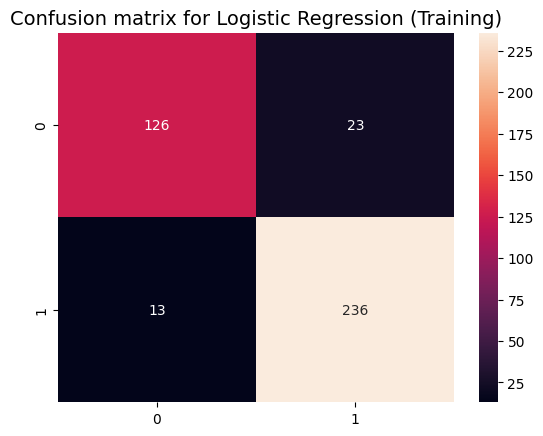

In [27]:
sns.heatmap(conf_matrix01,annot=True,fmt='g')
plt.title('Confusion matrix for Logistic Regression (Training)',fontsize=14)

Text(0.5, 1.0, 'Confusion matrix for Logistic Regression (Testing)')

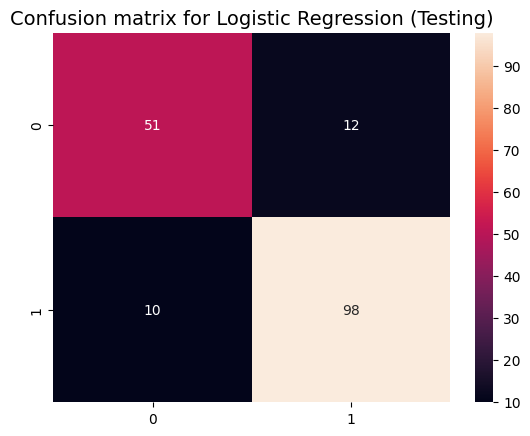

In [28]:

sns.heatmap(conf_matrix02,annot=True,fmt='g')
plt.title('Confusion matrix for Logistic Regression (Testing)',fontsize=14)

---

### Conclusion

In summary, we can see that the logistic regression single neuron model performs well on the Breast Cancer Wisconsin data. It performs a little better than linear regression when considering the non-linearly seperable data.